In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transduction import (
    FST, EPSILON, PrecoverDecomp, examples, Precover, AbstractAlgorithm,
    LazyRecursive, BuggyLazyRecursive, EagerNonrecursive, LazyPrecoverNFA, LazyNonrecursive,    
)
from transduction.fsa import FSA
from transduction.peekaboo import Peekaboo, PeekabooPrecover, recursive_testing
from transduction.util import display_table

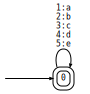

In [3]:
fst = examples.replace([('1', 'a'), ('2', 'b'), ('3', 'c'), ('4', 'd'), ('5', 'e')])
fst

In [4]:
p = Peekaboo(fst)
target = ''
have = p(target)
tmp = EagerNonrecursive(fst)
want = {y: tmp(target + y) for y in tmp.target_alphabet}
assert have == want

target = 'abc'
have = p(target)
tmp = EagerNonrecursive(fst)
want = {y: tmp(target + y) for y in tmp.target_alphabet}
assert have == want

In [5]:
#p.nfa

In [6]:
#p.dfa

In [7]:
#assert np.sum([Precover(fst, target + y).fsa for y in fst.B - {EPSILON}]).equal(p.nfa)

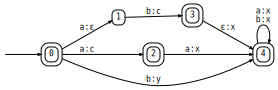

In [8]:
fst = examples.samuel_example()
fst

In [9]:
p = Peekaboo(fst)
target = 'y'
have = p(target)
tmp = EagerNonrecursive(fst)
want = {y: tmp(target + y) for y in tmp.target_alphabet}

print(have)
print(want)

assert have == want

{'x': ({'ba', 'bb'}, set()), 'y': (set(), set()), 'c': (set(), set())}
{'x': ({'ba', 'bb'}, set()), 'y': (set(), set()), 'c': (set(), set())}


In [10]:
display(p.nfa)
display(p.dfa)


In [11]:
p = Peekaboo(fst)
target = ''
have = p(target)
tmp = EagerNonrecursive(fst)

want = {y: tmp(target + y) for y in tmp.target_alphabet}

print('have=', have)
print('want=', want)

assert have == want

have= {'x': (set(), set()), 'y': ({'b'}, set()), 'c': ({'a'}, set())}
want= {'x': (set(), set()), 'y': ({'b'}, set()), 'c': ({'a'}, set())}


In [13]:
recursive_testing(fst, '', 4)

In [14]:
#union = FSA.zero
#for y in sam.B - {EPSILON}:
#    union |= Precover(sam, y).fsa
#union.min()

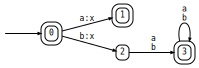

In [15]:
f = FST()
f.add_I(0)
f.add_F(0)

f.add_arc(0, 'a', 'x', 1)
f.add_arc(0, 'b', 'x', 2)

f.add_arc(2, 'a', 'a', 3)
f.add_arc(2, 'b', 'b', 3)

f.add_arc(3, 'a', 'a', 3)
f.add_arc(3, 'b', 'b', 3)

f.add_F(1)
f.add_F(3)

f

In [16]:
p = Peekaboo(f)
target = ''
have = p(target)
tmp = EagerNonrecursive(f)

want = {y: tmp(target + y) for y in tmp.target_alphabet}

print('have=', have)
print('want=', want)

assert have == want

have= {'x': ({'ba', 'bb'}, {'a'}), 'a': (set(), set()), 'b': (set(), set())}
want= {'x': ({'ba', 'bb'}, {'a'}), 'a': (set(), set()), 'b': (set(), set())}


In [17]:
recursive_testing(f, '', 5)